# Expanded Stock Market Analysis
This project visualizes the historical stock prices of Apple (AAPL), Google (GOOGL), Microsoft (MSFT), Amazon (AMZN), Tesla (TSLA), and Netflix (NFLX) from 2020 to 2023.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# List of stock symbols
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'NFLX']

# Fetch data
data = yf.download(stocks, start="2020-01-01", end="2023-01-01")
data.to_csv('stock_data.csv')
data.head()


[*********************100%%**********************]  6 of 6 completed


Price       Adj Close                                                \
Ticker           AAPL       AMZN      GOOGL        MSFT        NFLX   
Date                                                                  
2020-01-02  72.876106  94.900497  68.355545  153.938187  329.809998   
2020-01-03  72.167610  93.748497  67.997955  152.021362  325.899994   
2020-01-06  72.742638  95.143997  69.810379  152.414322  335.829987   
2020-01-07  72.400551  95.343002  69.675537  151.024643  330.750000   
2020-01-08  73.565201  94.598503  70.171463  153.430283  339.260010   

Price                      Close                                    ...  \
Ticker           TSLA       AAPL       AMZN      GOOGL        MSFT  ...   
Date                                                                ...   
2020-01-02  28.684000  75.087502  94.900497  68.433998  160.619995  ...   
2020-01-03  29.534000  74.357498  93.748497  68.075996  158.619995  ...   
2020-01-06  30.102667  74.949997  95.143997  69.890503  159.029999  ...   
2020-01-07  31.270666  74.597504  95.343002  69.755501  157.580002  ...   
2020-01-08  32.809334  75.797501  94.598503  70.251999  160.089996  ...   

Price            Open                                        Volume            \
Ticker          GOOGL        MSFT        NFLX       TSLA       AAPL      AMZN   
Date                                                                            
2020-01-02  67.420502  158.779999  326.100006  28.299999  135480400  80580000   
2020-01-03  67.400002  158.320007  326.779999  29.366667  146322800  75288000   
2020-01-06  67.581497  157.080002  323.119995  29.364668  118387200  81236000   
2020-01-07  70.023003  159.320007  336.470001  30.760000  108872000  80898000   
2020-01-08  69.740997  158.929993  331.489990  31.580000  132079200  70160000   

Price                                               
Ticker         GOOGL      MSFT     NFLX       TSLA  
Date                                                
2020-01-02  27278000  22622100  4485800  142981500  
2020-01-03  23408000  21116200  3806900  266677500  
2020-01-06  46768000  20813700  5663100  151995000  
2020-01-07  34330000  21634100  4703200  268231500  
2020-01-08  35314000  27746500  7104500  467164500  

[5 rows x 36 columns]

In [3]:
# Load the data
data = pd.read_csv('stock_data.csv', header=[0, 1], index_col=0, parse_dates=True)
data['Close'].head()


Ticker,AAPL,AMZN,GOOGL,MSFT,NFLX,TSLA
Date,,,,,,
2020-01-02,75.087502,94.900497,68.433998,160.619995,329.809998,28.684000
2020-01-03,74.357498,93.748497,68.075996,158.619995,325.899994,29.534000
2020-01-06,74.949997,95.143997,69.890503,159.029999,335.829987,30.102667
2020-01-07,74.597504,95.343002,69.755501,157.580002,330.750000,31.270666
2020-01-08,75.797501,94.598503,70.251999,160.089996,339.260010,32.809334


# Stock Closing Prices

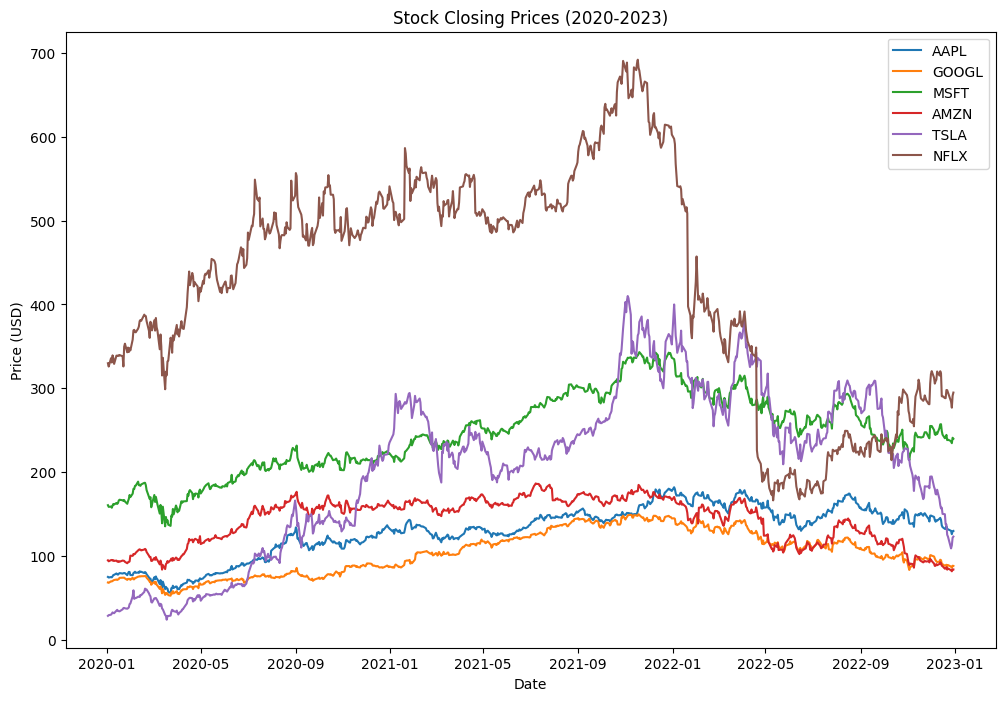

In [4]:
plt.figure(figsize=(12, 8))
for stock in stocks:
    sns.lineplot(data=data['Close'][stock], label=stock)

plt.title('Stock Closing Prices (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Daily Percentage Change

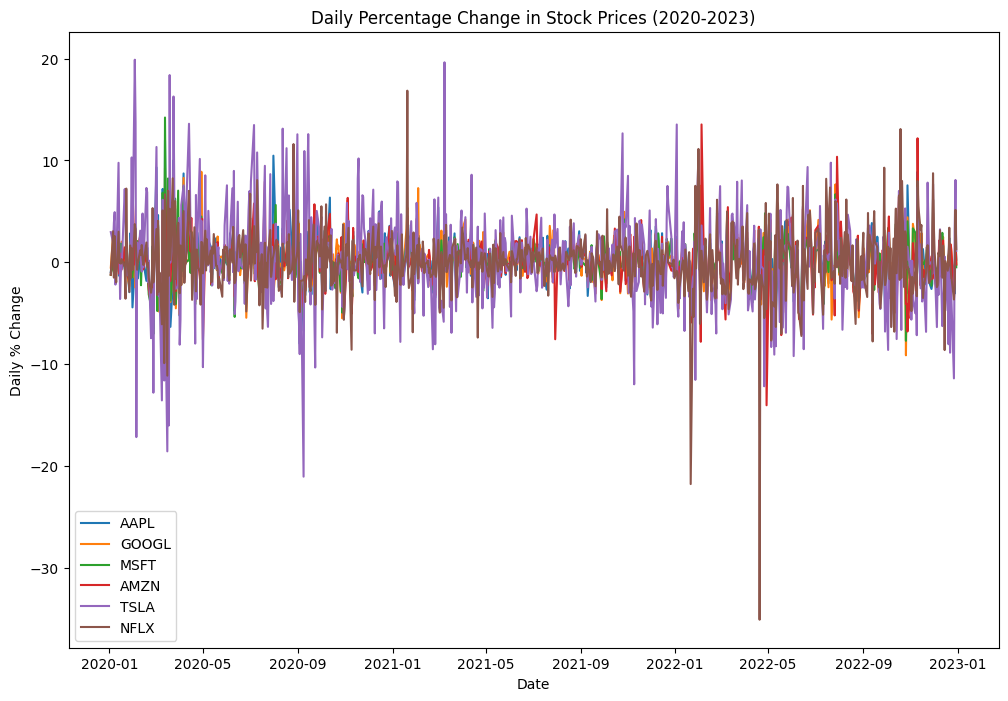

In [5]:
# Calculate daily percentage change
daily_change = data['Close'].pct_change() * 100

# Plot daily percentage change
plt.figure(figsize=(12, 8))
for stock in stocks:
    sns.lineplot(data=daily_change[stock], label=stock)

plt.title('Daily Percentage Change in Stock Prices (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.legend()
plt.show()


# Rolling Mean (Moving Average)



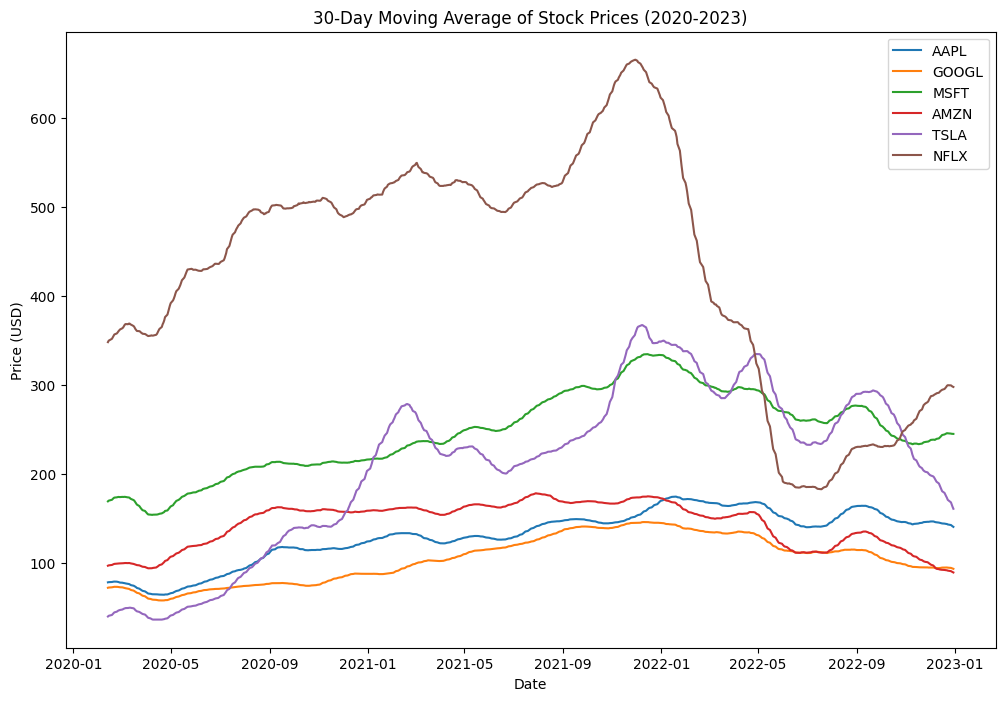

In [6]:
# Calculate 30-day moving average
moving_avg = data['Close'].rolling(window=30).mean()

# Plot 30-day moving average
plt.figure(figsize=(12, 8))
for stock in stocks:
    sns.lineplot(data=moving_avg[stock], label=stock)

plt.title('30-Day Moving Average of Stock Prices (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


# Correlation Heatmap

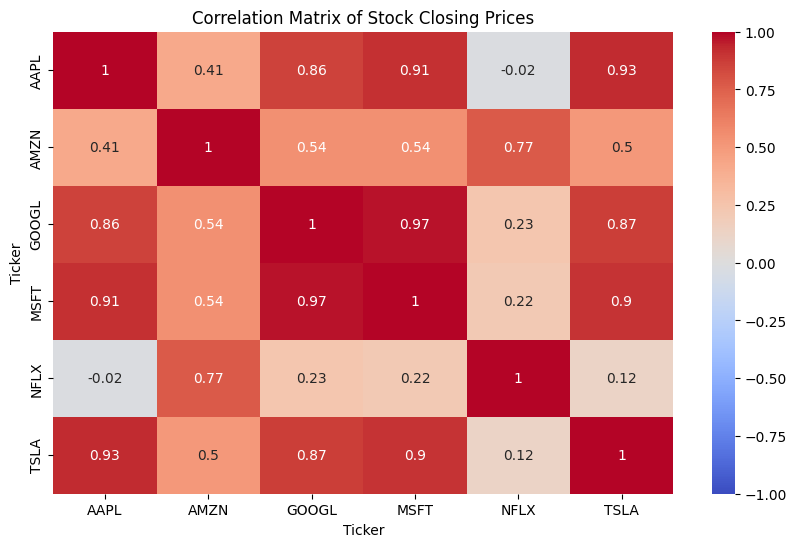

In [7]:
# Calculate correlation matrix
correlation_matrix = data['Close'].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Closing Prices')
plt.show()


# Stock Distribution (Boxplot)

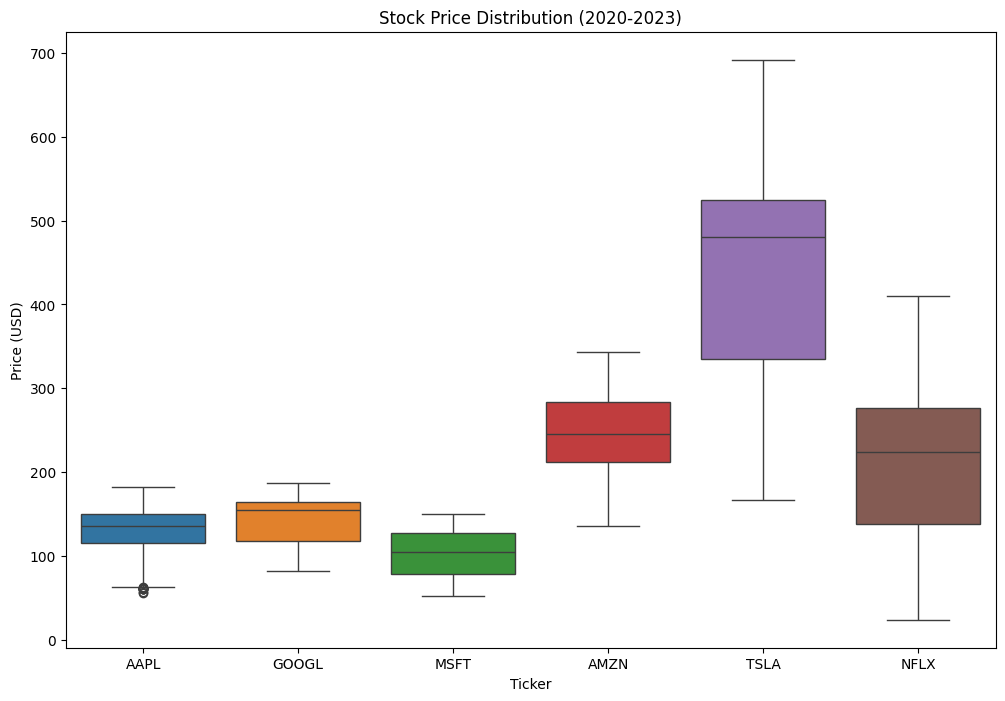

In [8]:
# Plot boxplot of stock prices
plt.figure(figsize=(12, 8))
sns.boxplot(data=data['Close'])
plt.title('Stock Price Distribution (2020-2023)')
plt.ylabel('Price (USD)')
plt.xticks(range(len(stocks)), stocks)
plt.show()
